# Number of Clusters

This experiment has the purpose of defining the number of clusters presented in the data. For that, we use the t-SNE for the projection of the data (dimensionality reduction), and an error metric to determine the best number of clusters. The metrics used are: square of the 2-norm distance metric, silhouette score and Davies-Bouldin Index.

In this notebook we employed the **square of the 2-norm distance**. This metric computes the mean distance of every point to its cluster.

Metrics such as adjusted rand index, mutual information based scores, homogeneity, completeness and V-measure can not be used in this work because they require the ground truth (true labels) of the data.

In [1]:
import sys
sys.path.append('../')
from src import reader as r
from src import visualization as v

In [2]:
import numpy as np
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score

In [4]:
X = r.readBOW()
print(X[:10])
print(X.shape)

['word2vec.csv', 'bags.csv', 'health.txt', 'health-dataset.zip', 'health-dataset']
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(13229, 1203)


In [6]:
from MulticoreTSNE import MulticoreTSNE as TSNE

smp_sz = 7000
tsne_bow = TSNE(n_jobs=-1, n_components=2, perplexity=500, verbose=True)
tsne_bow_result = tsne_bow.fit_transform(X[:smp_sz])

## Elbow Method --- K-means++
This methods aims to define the best number of clusters (K) by the cost function J computed during the K-means.

In [8]:
error = 0
Ks = []
Js = []
Epsilon = 1e-2
it = 1
J = 0.

k = 2
print("###############################")
while ((error > Epsilon) or (it == 1)):
    print("Number of Clusters:",k)
    print("Starting K-means++")
    cluster = KMeans(n_clusters=k,random_state=42,n_jobs=-1)
    cluster_result = cluster.fit(X)
    print("Finished")
    error = J
    J = cluster_result.inertia_ / X.shape[0]        
    print("J =",J)
    error = abs(error-J)  
    Ks.append(k)
    print("error =",error)
    Js.append(J)
    k += 10
    it += 1
    print("###############################")
    
best_K = k-10
print("\nBest k:",best_K)
print("Number of iterations:",it)

###############################
Number of Clusters: 2
Starting K-means++
Finished
J = 0.972891299973
error = 0.972891299973
###############################
Number of Clusters: 12
Starting K-means++
Finished
J = 0.928148384642
error = 0.044742915331
###############################
Number of Clusters: 22
Starting K-means++
Finished
J = 0.906257303888
error = 0.0218910807546
###############################
Number of Clusters: 32
Starting K-means++
Finished
J = 0.885160272787
error = 0.0210970311009
###############################
Number of Clusters: 42
Starting K-means++
Finished
J = 0.866760132696
error = 0.0184001400905
###############################
Number of Clusters: 52
Starting K-means++
Finished
J = 0.855027514946
error = 0.0117326177497
###############################
Number of Clusters: 62
Starting K-means++
Finished
J = 0.843254072865
error = 0.0117734420819
###############################
Number of Clusters: 72
Starting K-means++
Finished
J = 0.830962405141
error = 0.012291667

J  [0.97289129997318802, 0.92814838464215421, 0.90625730388754422, 0.88516027278661402, 0.86676013269615171, 0.85502751494645146, 0.84325407286454424, 0.83096240514072983, 0.84039504571021062]
Ks  [2, 12, 22, 32, 42, 52, 62, 72, 82]


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

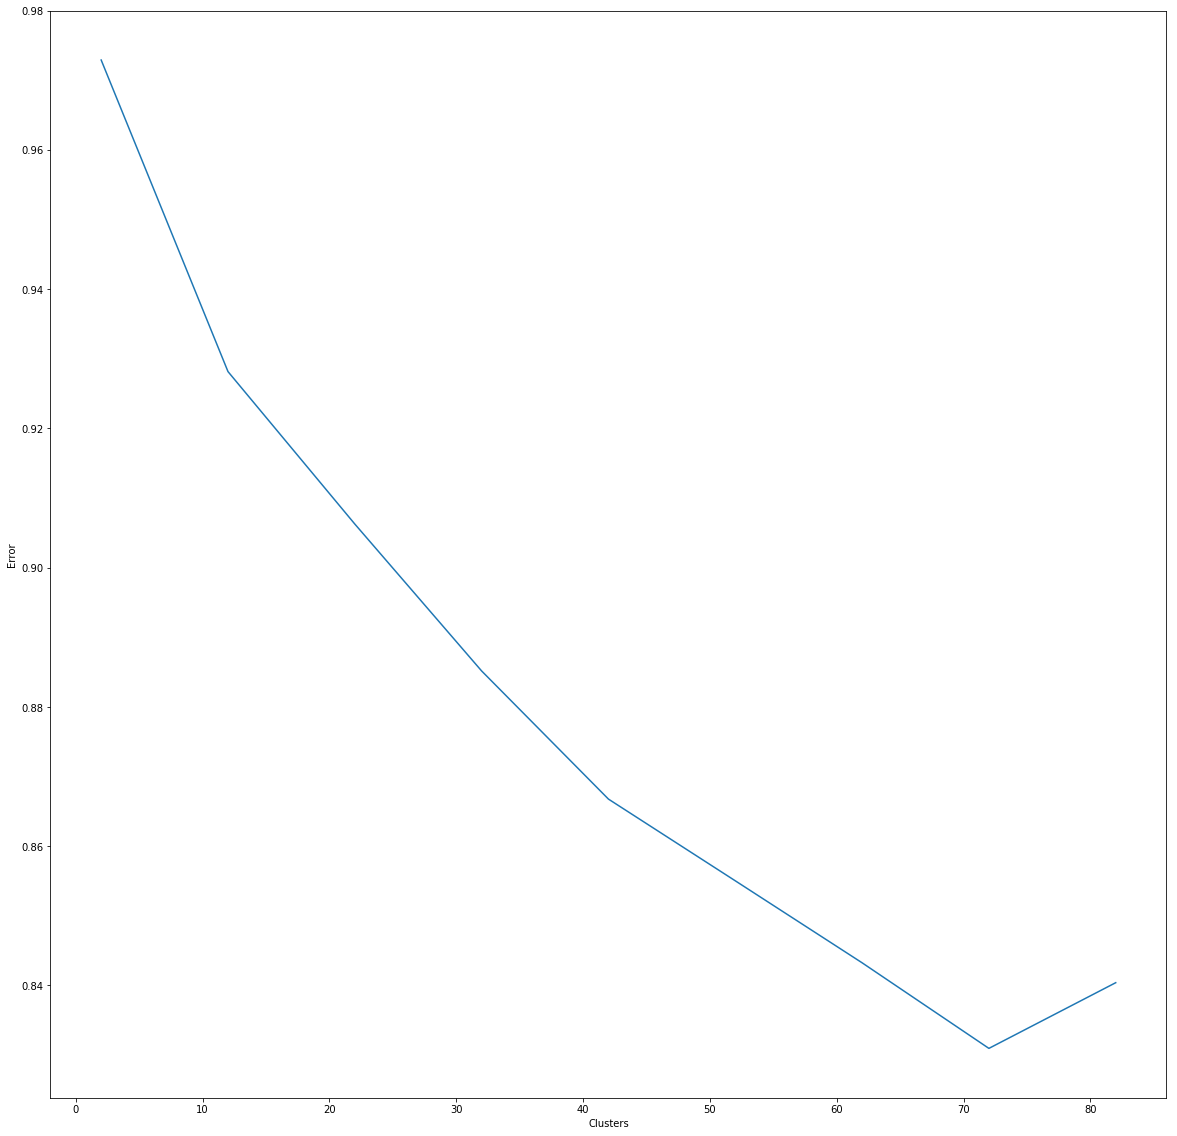

In [9]:
v.plot_cluster_errors(Ks,Js)

After analysing the elbow curve, we conclude that the best number of clusters (K) is 52.

In [11]:
print("#############################")
print("Best K =", best_K)
print("Applying K-means")
best_cluster = KMeans(n_jobs=-1,n_clusters=best_K)
best_cluster_result = best_cluster.fit(X)
print("Finished")
print("#############################")

#############################
Best K = 82
Applying K-means
Finished
#############################


In [12]:
true_label = best_cluster_result.labels_

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

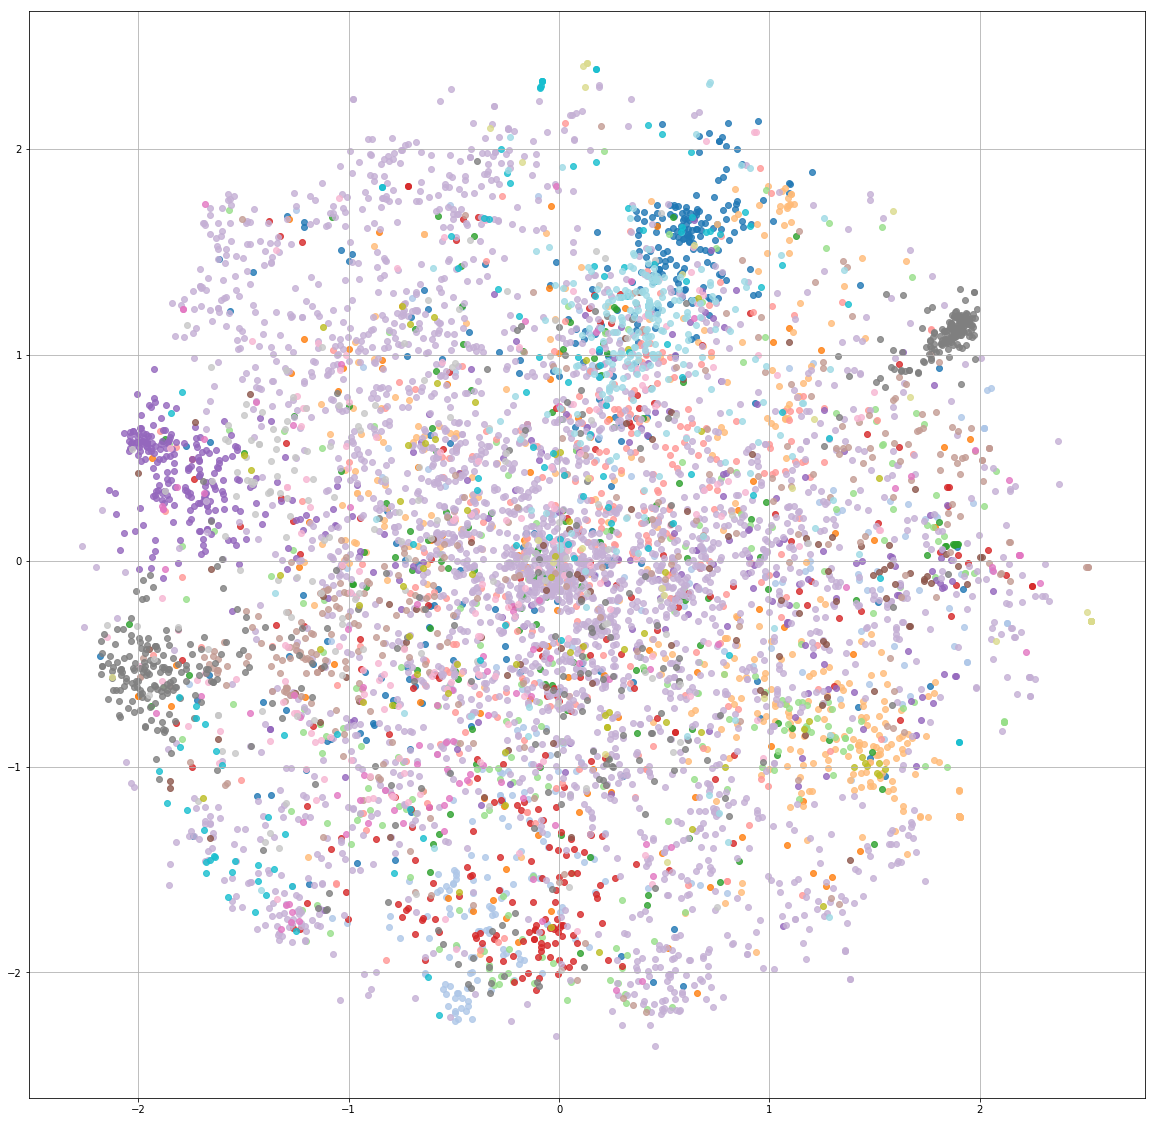

In [13]:
v.visualize_sup_scatter(tsne_bow_result, true_label[:smp_sz])

## DBSCAN
In this section we aim to define the best number of clusters (K), but this time by means of the Density-Based Spatial Clustering of Applications with Noise (DBSCAN). The DBSCAN use a proximity and density primitives to determine if a datapoint belongs to an existing cluster or if another one should be created.

In [14]:
dbscan = DBSCAN(eps=0.9,min_samples=2)
y = dbscan.fit_predict(X)

Number of clusters 772


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

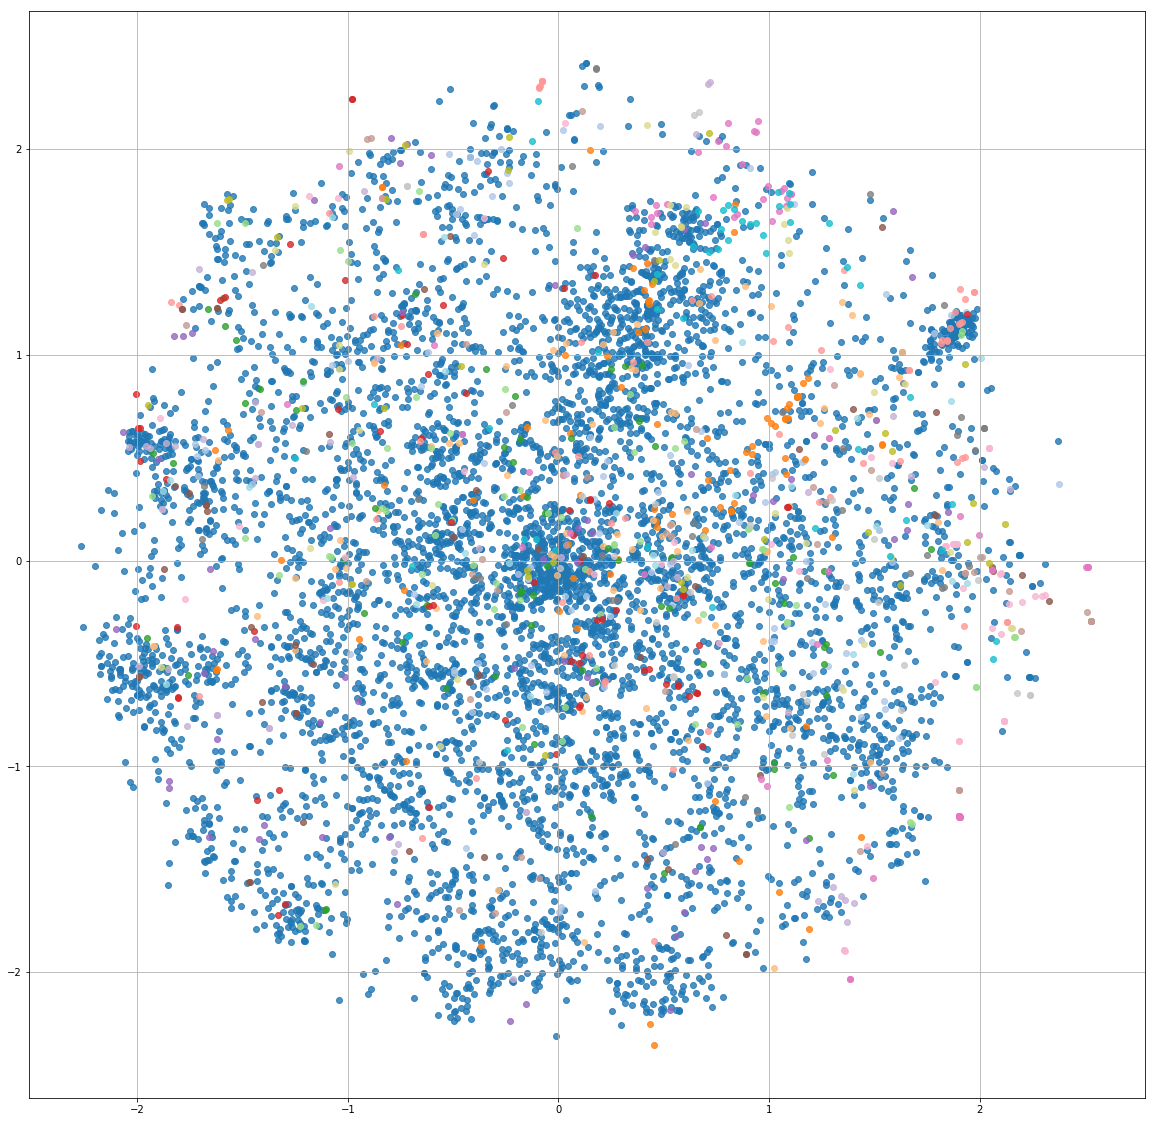

In [15]:
print("Number of clusters",len(np.unique(y)))
v.visualize_sup_scatter(tsne_bow_result, y[:smp_sz])